In [42]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
import datetime
import time

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


def compute_net_basic(path, name):
    df = pd.read_csv(path)
    df = df.tail(250)
    total = len(df)
    print(total)

    bin = np.arange(0,10,0.2)
    cut = pd.cut(df['pcnt_real_time'], bins=bin, labels=bin[:-1], right=False)
    counts = pd.value_counts(cut,sort=False)
    sum_counts = (total - counts.cumsum().to_frame()) / total
    sum_counts.plot(title=name + ' 网格频率')
    plt.grid()

    ii = list(sum_counts.index)
    sum_counts['index'] = ii
    earn = sum_counts['pcnt_real_time'] * sum_counts['index'] * sum_counts['index']
    earn = earn.to_frame()
    earn.columns = ['earn']
    earn.plot(title=name + ' 利润表')
    plt.grid()

In [ ]:
print("调用全部运行，开始更新所有数据... ...")
%run fetch.py

250


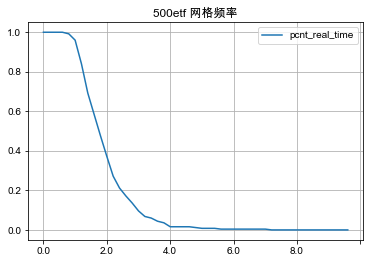

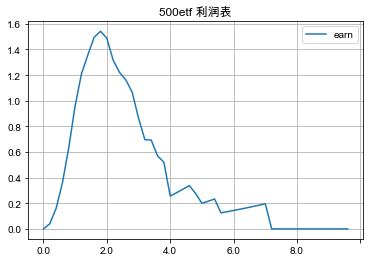

In [43]:
compute_net_basic('./sh510500.csv', '500etf')